# Intro
##### My motivation for putting this notebook together was to get more practice in the fundamentals of exploratory data analysis. The approach to EDA in this notebook follows that of the following Kaggle posting: 
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
##### Shout out to the posting's author, Pedro Marcelino 🤘

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [16]:
# importing the data
df_train = pd.read_csv('~/Documents/housing_prices/data/raw/train.csv')

## Examining our features

In [17]:
# reading in csv of var, var_type, var_segment, and their expected impact on the target var - this helps us build some intuition about our dataset
# google sheets for variable-evaluation exervise: https://docs.google.com/spreadsheets/d/1M4GWWMqDvx5XISEovtSRmz-7kkFhUVSqcwg2Z2VT7qc/edit?usp=sharing

var_eval = pd.read_csv('/Users/jeffrey/Documents/housing_prices/data/raw/var_eval.csv')

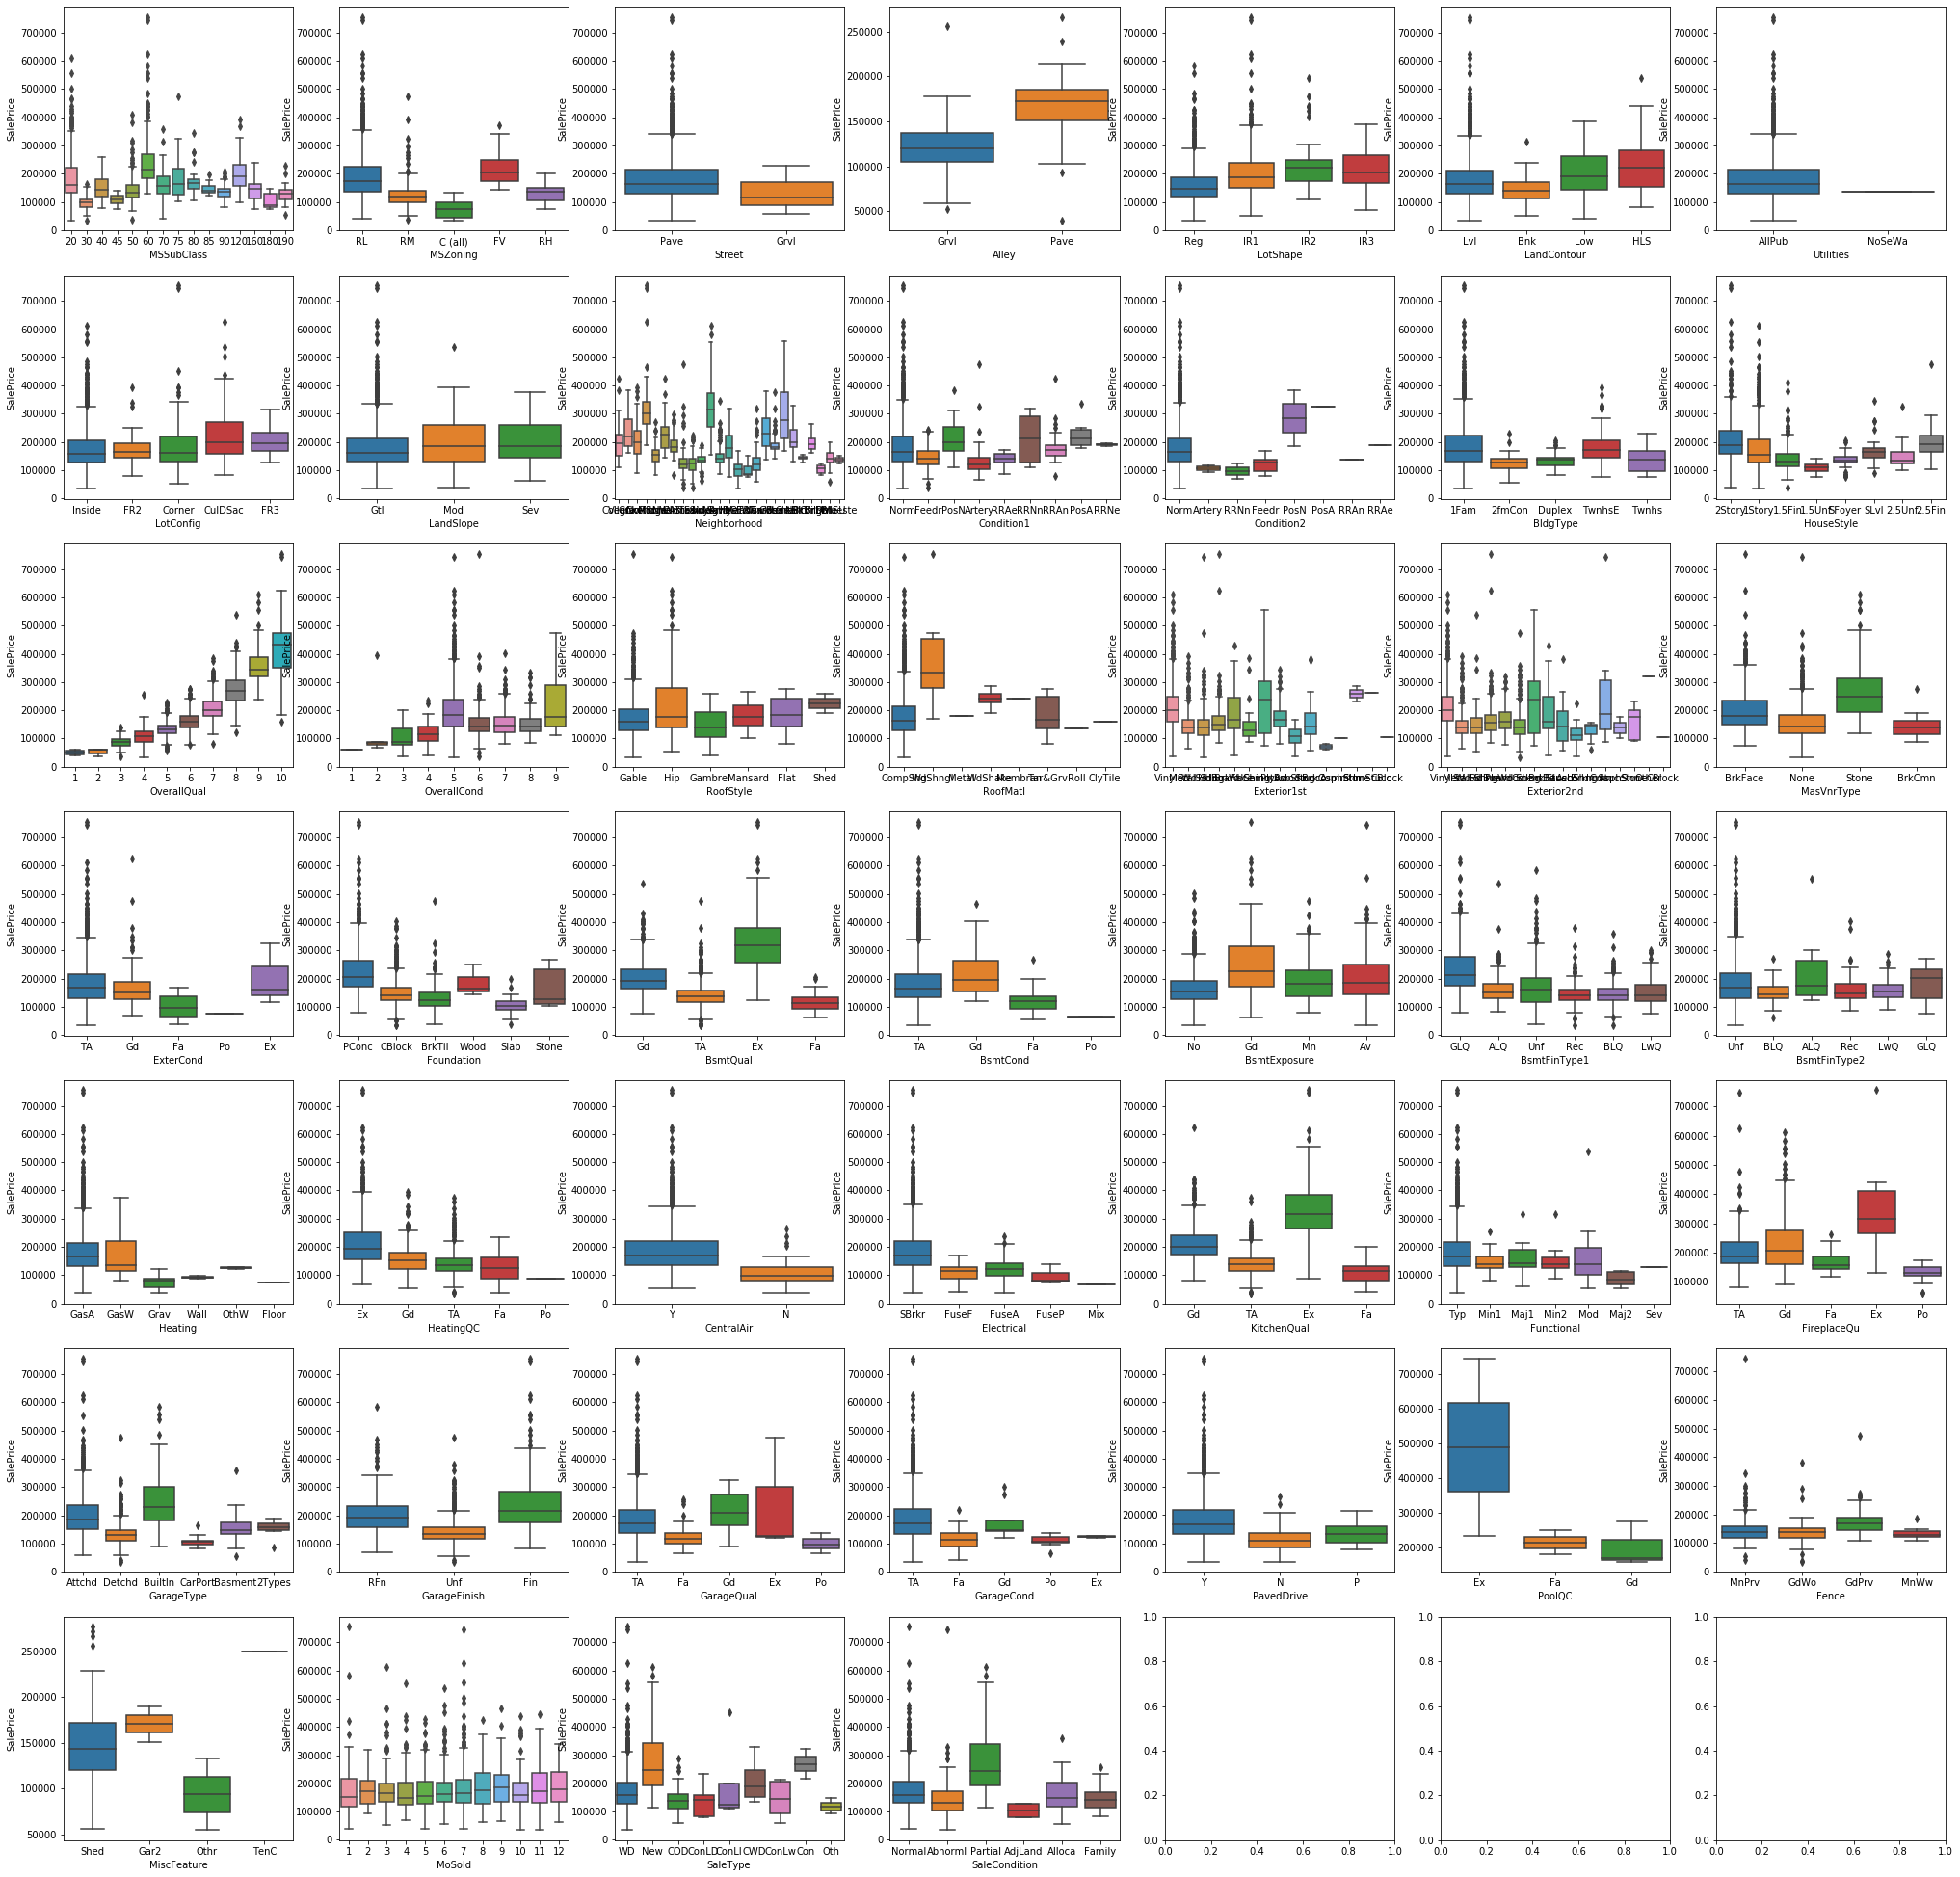

In [18]:
# boxplots for categorical vars
cat_types = list(var_eval[var_eval['Type']=='cat']['Variable Name'])

fig, axs = plt.subplots(7, 7, figsize=(35, 35))
axs = axs.flatten()
for i in range(len(cat_types)):
    sns.boxplot(y='SalePrice', x=cat_types[i], data=df_train, ax=axs[i])

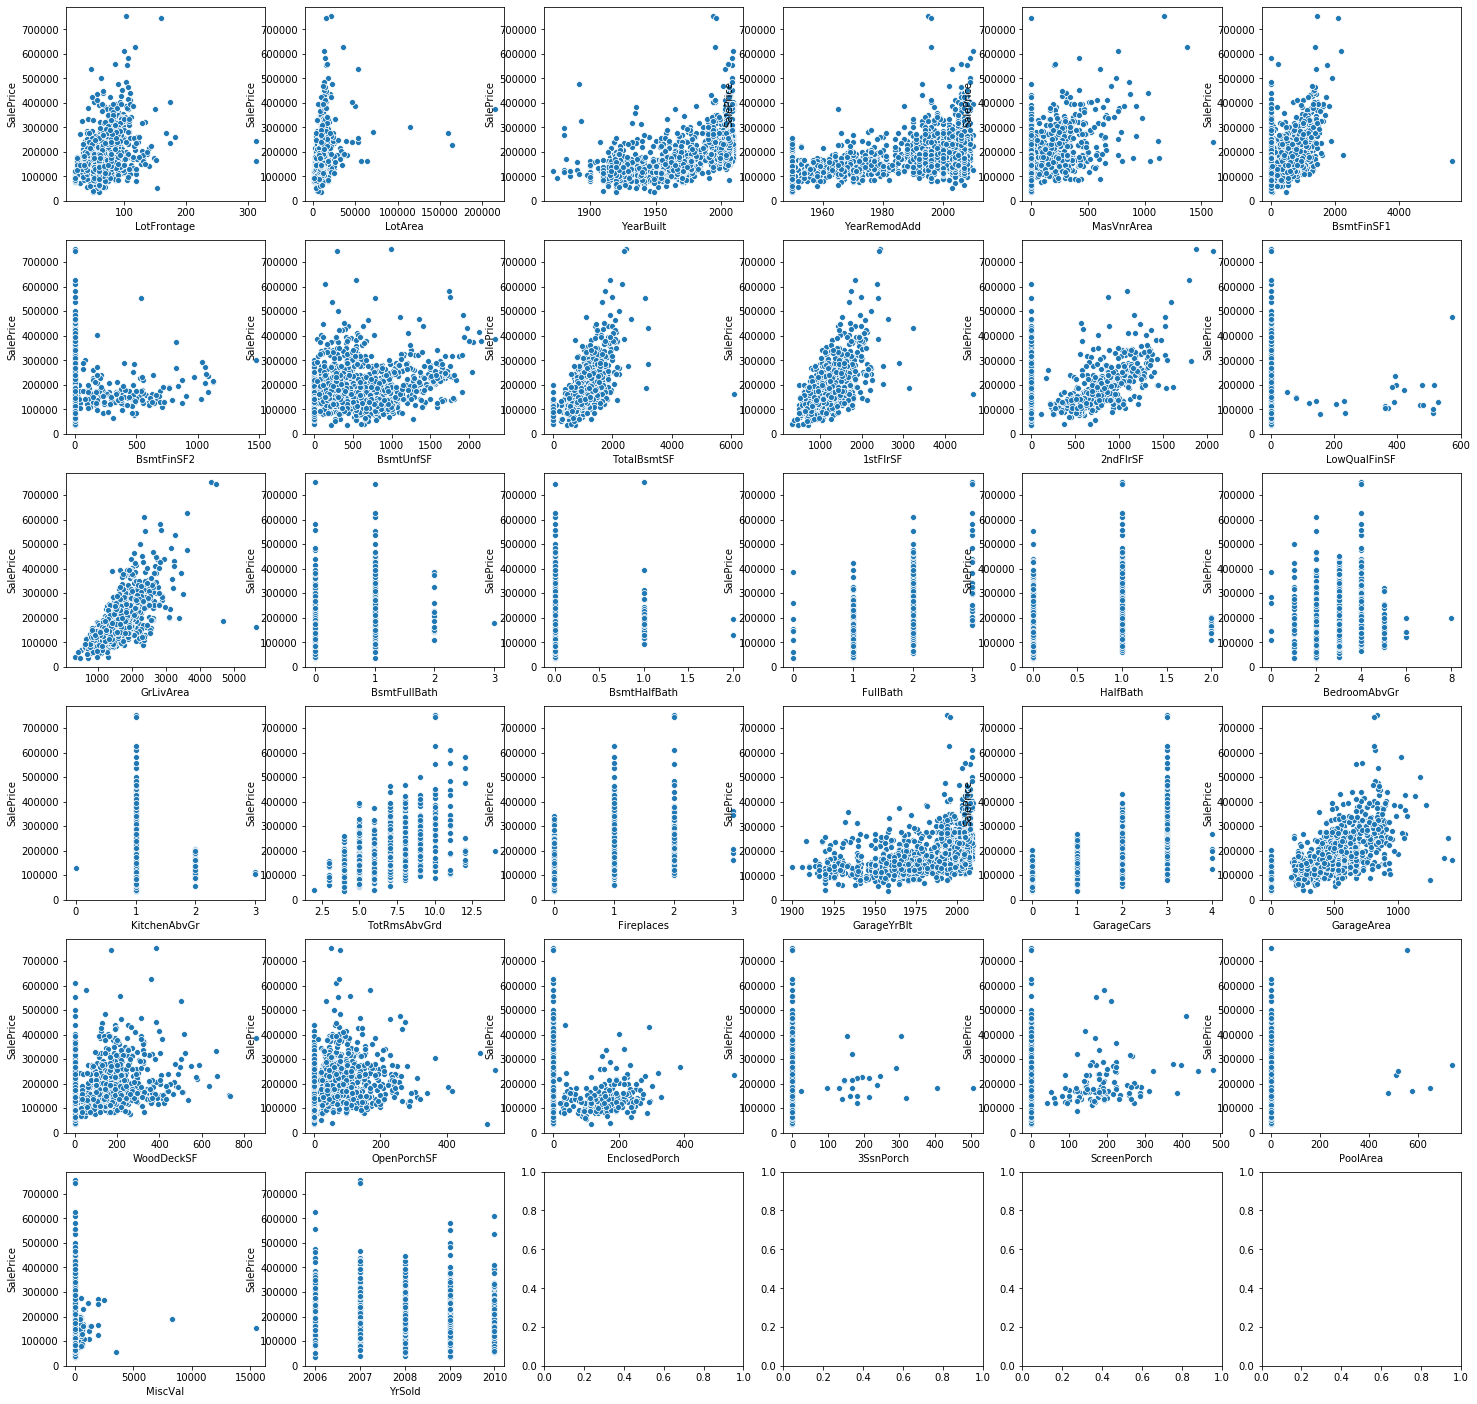

In [19]:
# scatterplots for our numerical data
num_types = list(var_eval[var_eval['Type']=='num']['Variable Name'])

fig, axs = plt.subplots(6, 6, figsize=(25, 25))
axs = axs.flatten()

for i in range(len(num_types)):
    sns.scatterplot(y='SalePrice', x=num_types[i], data=df_train, ax=axs[i])

## Examining our target var - SalePrice

In [20]:
df_train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

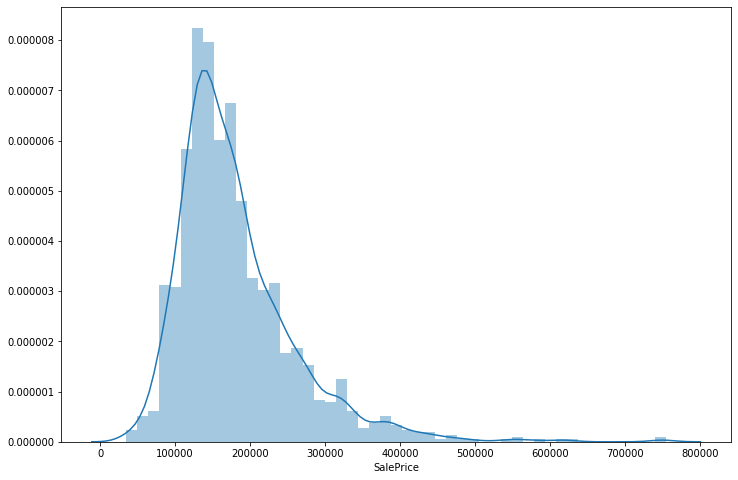

In [21]:
plt.figure(figsize=(12, 8))
sns.distplot(df_train.SalePrice);

- Distribution skews right and is not normal

In [22]:
print("Skewness: {:,.3}".format(df_train.SalePrice.skew()))
print("Kurtosis: {:,.3}".format(df_train.SalePrice.kurt()))

Skewness: 1.88
Kurtosis: 6.54


## Closer examination of relationship between 'high' impact vars and target var

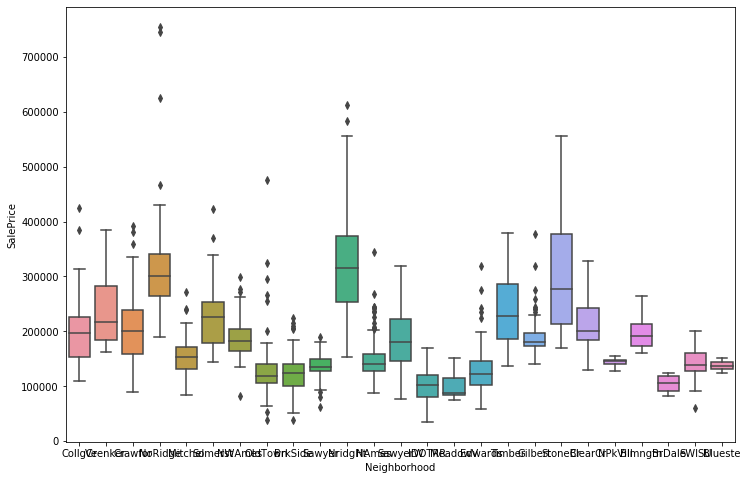

In [23]:
var = 'Neighborhood'
plt.figure(figsize=(12, 8))
sns.boxplot(y='SalePrice', x=var, data=df_train);

- There are certainly some higher-val nieghborhoods

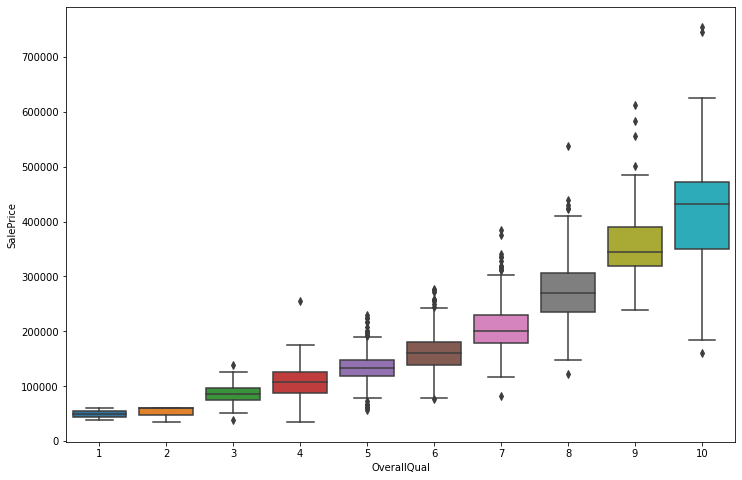

In [24]:
var = 'OverallQual'
plt.figure(figsize=(12, 8))
sns.boxplot(y='SalePrice', x=var, data=df_train);

- OverallQual appears to have strong predictive power

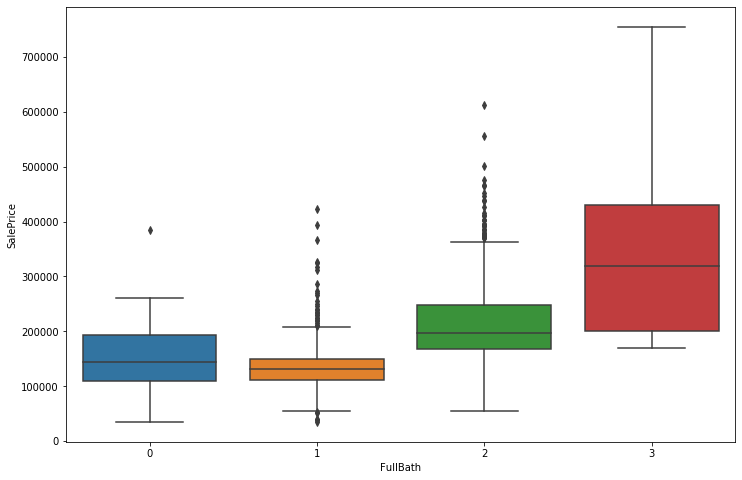

In [25]:
var = 'FullBath'
plt.figure(figsize=(12, 8))
sns.boxplot(y='SalePrice', x=var, data=df_train);

- The jump from 1 to 2 baths appeares to be important
but the information here could be contained in total living area

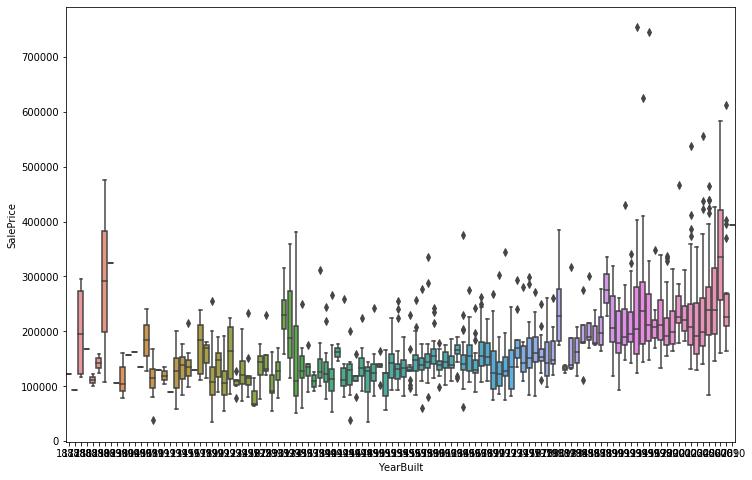

In [26]:
var = 'YearBuilt'
plt.figure(figsize=(12, 8))
sns.boxplot(y='SalePrice', x=var, data=df_train);

- This var didn't appear to be significant in this initial inspection since I incorrectly labeled it as a num var
- Consequently, a scatterplot and not a boxplot was used for visualization
- As the kaggle notebook references, it is unclear whether the SalePrice has been adjusted for inflation
- If is has been adjusted, this visualization is an appropriate comparison across the var levels and there appears to be a 
 relationship between newness and SalePrice

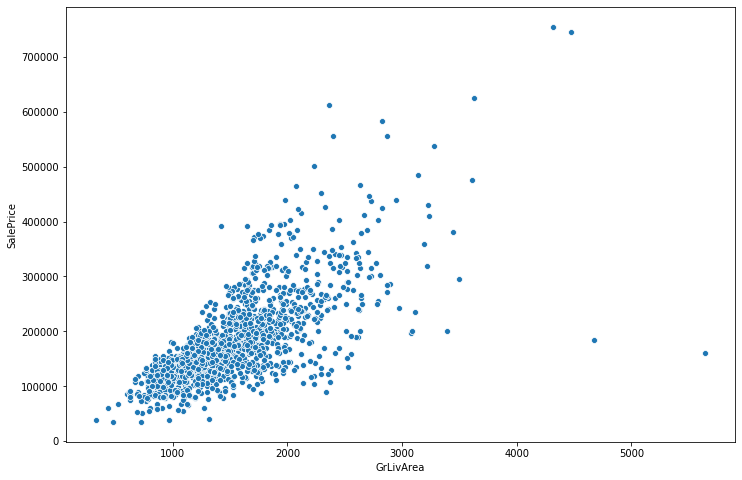

In [27]:
var = 'GrLivArea'
plt.figure(figsize=(12, 8))
sns.scatterplot(y='SalePrice', x=var, data=df_train);

- Strong linear relationship here

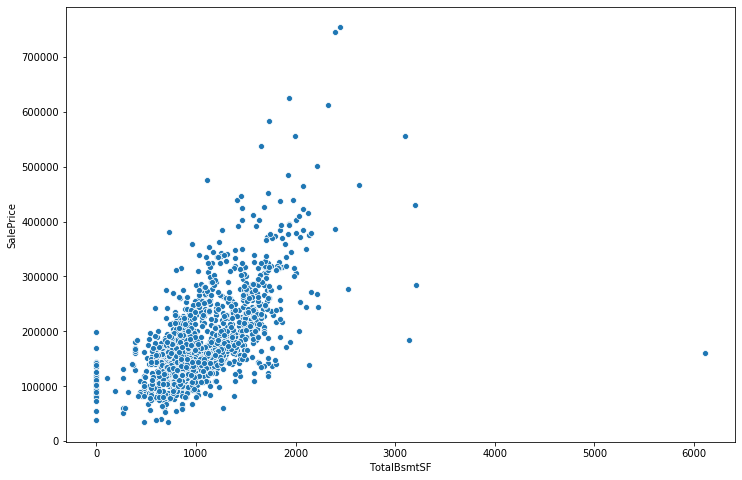

In [28]:
var = 'TotalBsmtSF'
plt.figure(figsize=(12, 8))
sns.scatterplot(y='SalePrice', x=var, data=df_train);

- Basement SF has a steeper slope than above-grade(ground) living area

- As the Kaggle notebook mentions, the inspection we've done so far has been mostly subjectively based - we've examined which vars we believe to be important
- This is a good first step for challenging our intuitions and updating our prior beliefs

## Moving along to a correlation heatmap

- Quick note, I think we've already gained some intuition around which vars are important by looking at boxplots for cat vars and scatterplots for num vars
- The notebook's author used scatterplots for all vars, but mentioned boxplots would be better for categorical vars which is where I got the idea
- This correlation matrix about to be produced seems like it would have the same issues as using scatterplots for cat vars did e.g. We wouldnt 
expect that the cat var 'Neighborhood' have any type of relatioship with SalePrice in a successive-level way aka a correlation so why include it in this matrix?
- That said, I'm sure I'll learn something new, so here goes

In [29]:
df_train.corr().head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


- Welp, I learned something - the Pandas corr function only uses vars with numerical vals.

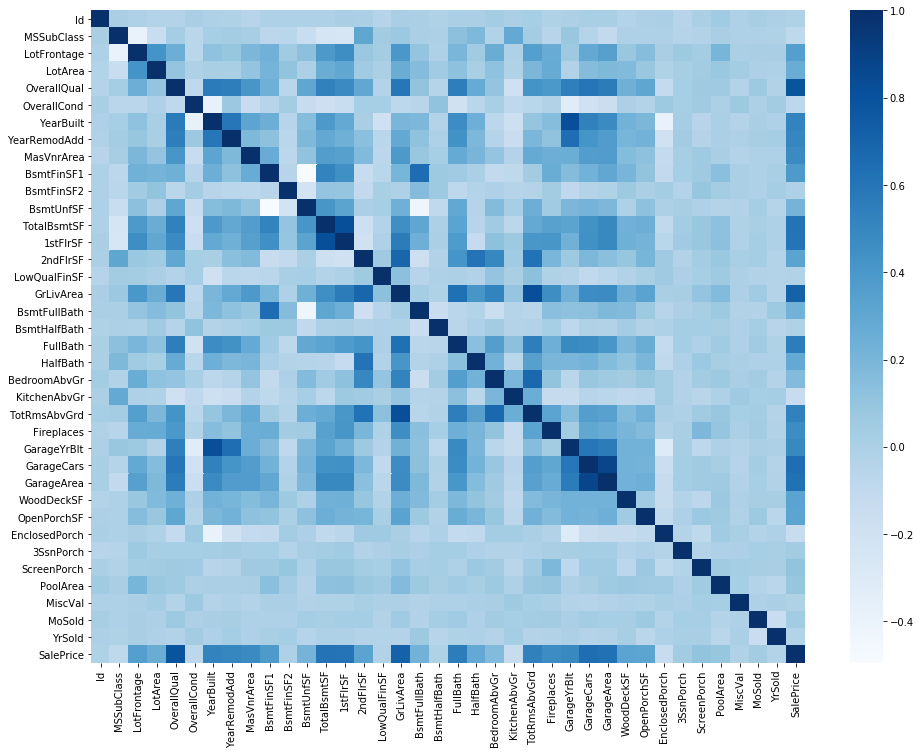

In [30]:
corrmat = df_train.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corrmat, cmap='Blues');

- This correlation matrix is useful for identifying potential multicollinearity instances - i.e. 1stFlrSF/TotalBsmtSf & GarageCars/GarageSF
- Also helpful for seeing which other vars are closely relatied to our target, SalePrice

## Zooming in on our Heatmap

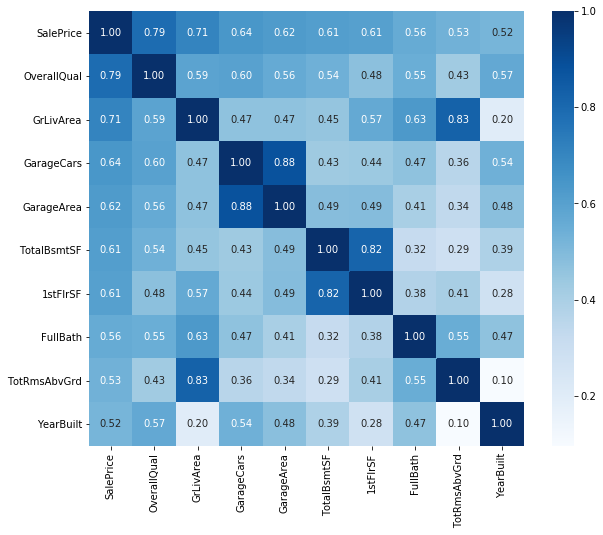

In [57]:
# Zooming in on the 10 vars with the strongest correlation

cols = corrmat.nlargest(10, 'SalePrice')
cols = cols[list(cols.index)]
plt.figure(figsize=(10, 8))
sns.heatmap(cols, cbar=True, annot=True, square=True,
            fmt='.2f', annot_kws={'size': 10}, cmap='Blues');

- going down the list ...
- QverallQual and GrLivArea are looking to be our true homies in this analysis
- GarageCars and GarageArea are highly correlate with eachother, we'll keep GarageCars since it has a stronger correlation with SalePrice
- Same goes for TotalBsmtSF and 1stFlrSF, TotalBsmtSF wins this battle
- Apparently Bathrooms don't matter that much? 
- TotRmsAbvGrd is highly correlated with GrLivArea, so we'll go ahead and drop that thang
- YearBuilt bottoms out our top-10 - post author recommends performing time-series on this; will do in future

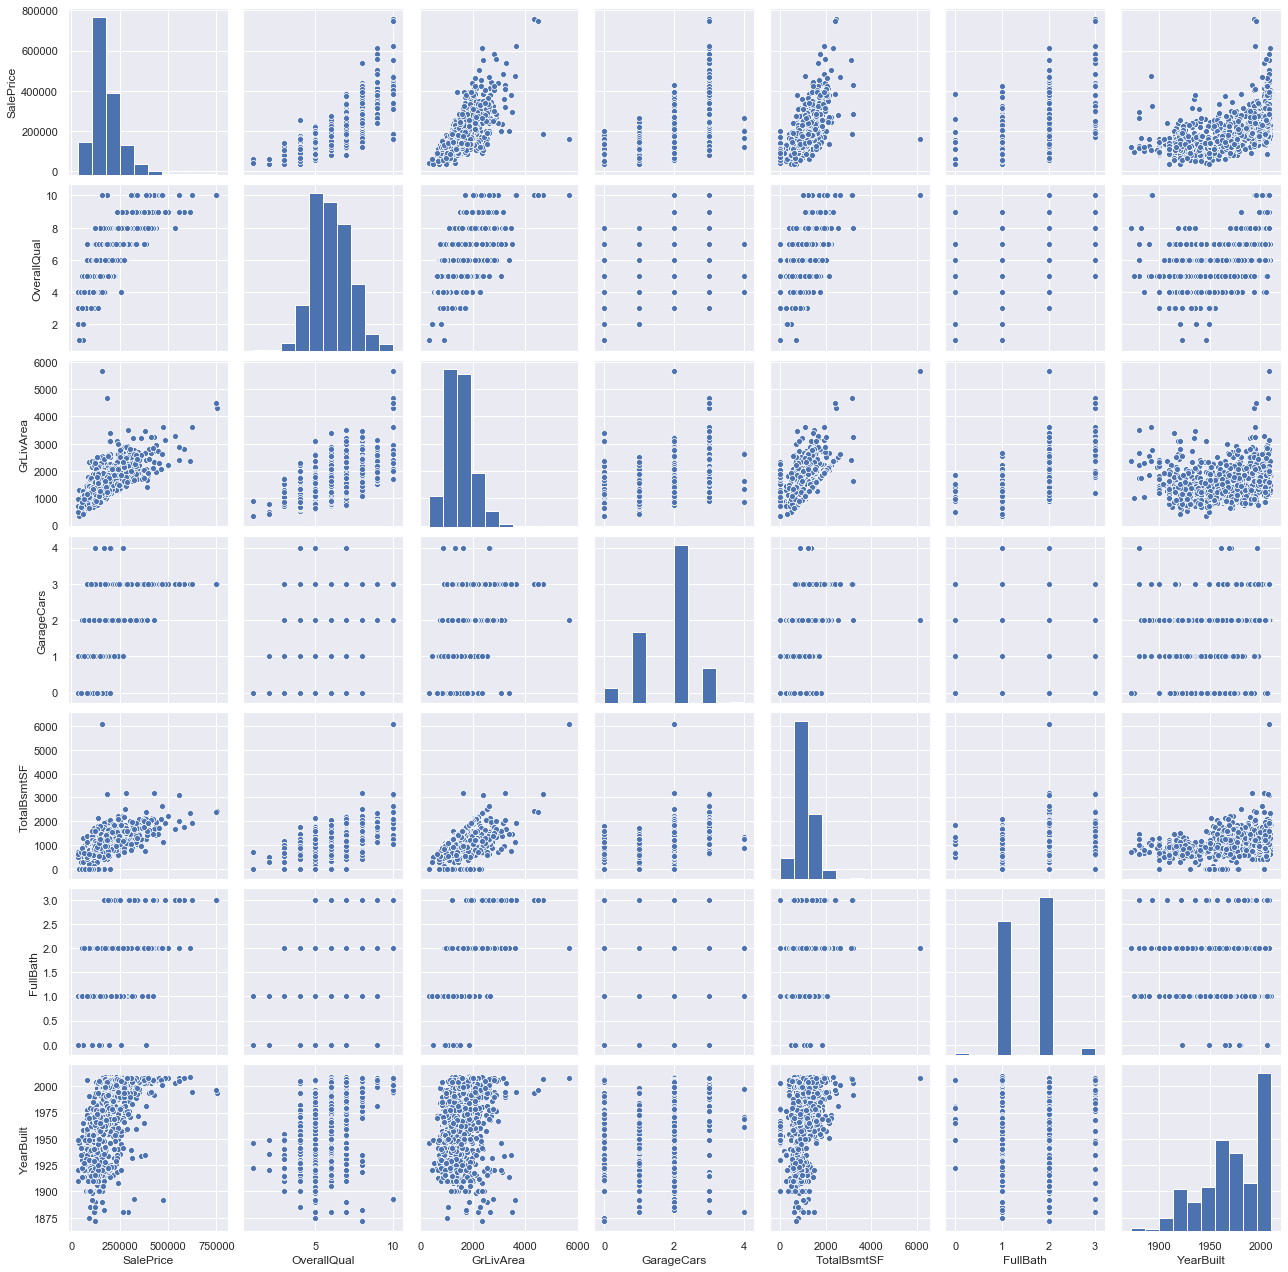

In [59]:
# scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea',
        'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show()


- Basement SF looks like its serving as a min amount for above-ground living SF, whichi what we'd expect
- Posting author points out that there may be a 'shy' exponential relationship between YearBuilt an SalePrice and that prices seems to be increasing more quickly in the past few years

## Missing Values

#### Things to consider when handling missing data:

- How prevelant is the missing data?
- Does the missing data follow a pattern or is it random?

In [80]:
missing_vals = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()
           ).sort_values(ascending=False)
missing_data = pd.concat([missing_vals, percent], axis=1, keys=[
                         'missing_values', 'percent']).sort_values(by=['percent'], ascending=False)
missing_data.head(20)

,missing_values,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


- Author recommends that we simply drop variables that have more than 15% of their data missing
- Hopefully it's the case these variables do not contain much information and perhaps thats why the data is missing in the first place
- Intuitively, it seems like the 6 vars that will be removed don't contain a lot of info about SalePrice - these don't seem to be the things we'd consider when buying a home

- Each of the next vars are describe the Garage and have the same number of missing vars. This is probably not a coincidence and they're all coming from the same observations. Since the GarageCars var was most correlated with SalePrice and that var does not have any missing values, the Author felt comfortable removing each of these other Garage vars